# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

    100% |████████████████████████████████| 368kB 32.8MB/s ta 0:00:01


Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/extension.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/fileupload/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [10]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [13]:
file_contents='''
The anti-racism protests are raging across the United States in the wake of George Floyd's death, who was killed after a police officer was seen kneeling on his neck while he was pinned to the floor.
In scenes both peaceful and violent across the country, thousands of protesters are taking to streets chanting "no justice, no peace" and "say his name. George Floyd." They are hoisting signs reading: "He said I can't breathe. Justice for George."
The demonstrations came as Derek Chauvin, the officer involved in Floyd's death, was arrested and charged with one count each of third-degree murder and second-degree manslaughter.  
While the protests have been aimed at the recurring police brutality against the people of colour, the greatness of democracy was witnessed across various demonstration sites where police officers took a knee to show solidarity with the protesters and apologise on behalf of their colleagues.
In Florida, police officers in Coral Gables, took a different approach to protest marchers when they knelt in remembrance of George Floyd. It made for an emotional moment as protesters wear seeing teary-eyed. 
In Florida, police officers in Coral Gables, took a different approach to protest marchers when they knelt in remembrance of George Floyd. It made for an emotional moment as protesters wear seeing teary-eyed. 
In another similar incident, as a non violent demonstration made its way in Philadelphia, one of the protesters stopped to see if he could find common ground with three police officers who were watching over the scene.  
The officers shook hands with protesters and then took a knee in solidarity.
The same thing happened in New York, where officers took the knee as protesters passed by a precinct in Queens.
Amid the angry demonstrations, multiple episodes showing police officers marching with protesters have also shown how humility and compassion is what a democracy is all about and that being brutal with protesters doesn't win people's trust.
A Michigan sheriff showed exactly the leadership required at this moment, when he joined protesters in Flint Township, putting down his weapon and saying, "I want to make this a parade, not a protest."  
Genesee County Sheriff Chris Swanson spoke with demonstrators who were met by police officers in riot gear, CNN reported.
"The only reason we're here is to make sure that you got a voice -- that's it," Swanson said in video clips shown on Twitter.
"These cops love you -- that cop over there hugs people," he said, pointing to an officer.
He was speaking to the crowd protesting police brutality and the death of George Floyd in Minneapolis.
'''
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    result = {}
    file_contents = file_contents.lower()
    for letter in file_contents:
        if letter in punctuations:
            file_contents=file_contents.replace(letter,'')
    # split file_contents into list
    text_list = file_contents.split()
    for letter in text_list:
        # filter new keys and uninteresting_words
        if letter not in uninteresting_words:
            if letter not in result.keys():
                result[letter]=0
            result[letter]+=1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(result)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

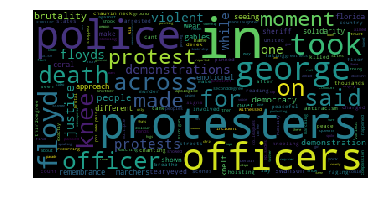

In [14]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!